In [1]:
#simple linear regression

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data=pd.read_csv("D:\\tala\\data science projects\\dr.fozouni\\Session 12, Simple Linear Regression.csv")
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     84 non-null     int64  
 1   GPA     84 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


In [4]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


<AxesSubplot:xlabel='SAT', ylabel='Density'>

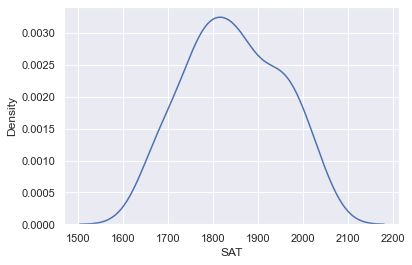

In [5]:
sns.kdeplot(data["SAT"] )

<AxesSubplot:xlabel='GPA', ylabel='Density'>

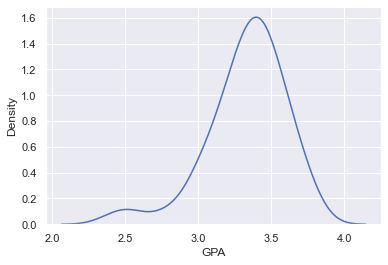

In [6]:
sns.kdeplot(data["GPA"])

In [7]:
x1=data["SAT"]
y=data["GPA"]

In [8]:
# making model by statsmodel OLS(ordinary least squeres)
x=sm.add_constant(x1) #for bias
model=sm.OLS(y, x).fit()

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           7.20e-11
Time:                        16:09:07   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

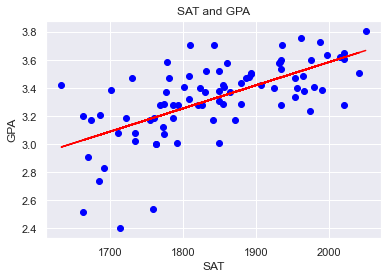

In [10]:
plt.scatter(x1 , y , c="blue")

y_hat=model.params[0]+model.params[1]*x1
fig=plt.plot(x1 , y_hat  , c="red")

plt.xlabel("SAT")
plt.ylabel("GPA")

plt.title("SAT and GPA")

plt.show()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SAT', ylabel='GPA'>

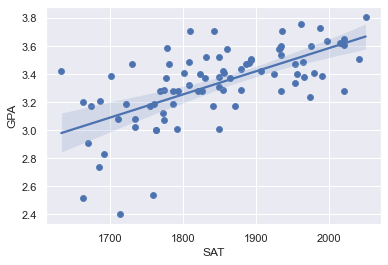

In [11]:
#drawing regression by OLS
sns.scatterplot(x1 , y)
sns.regplot(x1 , y)

In [12]:
#finding coefisionts by numpy
np.polyfit(x1 ,y ,deg=1)# deg = simple linear regression(only one independant varaible) y=a*x1 +b

array([0.00165569, 0.2750403 ])

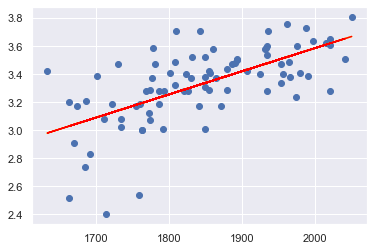

In [13]:
prediction_numpy=0.00165569 *x1 +  0.2750403
plt.scatter( x1 , y)
fig1=plt.plot(x1 , prediction_numpy , c="yellow")
fig=plt.plot(x1 , y_hat  , c="red")

plt.show()

# modeling by sklearn

In [14]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test=train_test_split(x1 , y , test_size=0.2 , random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression

In [17]:
# for inputs with only one features we have to reshape x_trains
x_train_matrix=x_train.values.reshape(-1,1)
x_train_matrix.shape

(67, 1)

In [19]:
reg=LinearRegression()
reg.fit(x_train_matrix , y_train)

LinearRegression()

In [23]:
x_test_matrix=x_test.values.reshape(-1,1)
x_test_matrix.shape

(17, 1)

In [35]:
y_pred=reg.predict(x_test_matrix)

In [28]:
reg.score(x_train_matrix , y_train)

0.36869676659596806

In [29]:
reg.score(x_test_matrix , y_test)

0.46949246374602116

In [30]:
#slope
reg.coef_

array([0.0014687])

In [32]:
reg.intercept_

0.6258624722253536

In [34]:
from sklearn.metrics import mean_absolute_error ,mean_squared_error

# Mean Absolute  Error (MAE)

In [36]:
mean_absolute_error(y_test ,y_pred)

0.16268831265429604

# Mean Squared Error (MSE)

In [37]:
mean_squared_error(y_test ,y_pred)

0.05248610269753724

# Root Mean Square Error (RMSE)

In [42]:
np.sqrt(mean_squared_error(y_test ,y_pred))

0.22909845634036308

# residual plot

Text(0.5, 1.0, 'residual')

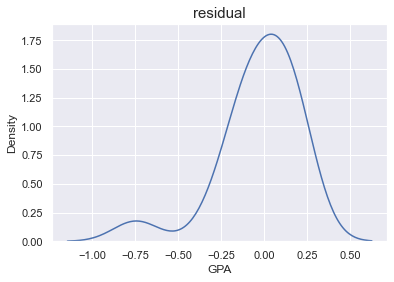

In [46]:
sns.kdeplot(y_test - y_pred) #(bins=10 , kde=True )
plt.title("residual" , size=15)

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GPA', ylabel='GPA'>

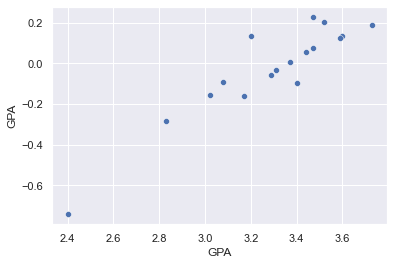

In [44]:
sns.scatterplot(y_test ,y_test - y_pred )

# exporting model by joblib

In [47]:
from joblib import dump

In [48]:
#final model for sending model
dump(reg ,"final_model.joblib")

['final_model.joblib']

# loading the model that exported to us

In [49]:
from joblib import load

In [50]:
loaded_model=load("final_model.joblib")

In [52]:
loaded_model

LinearRegression()